#Analiza podataka

Ova analiza podataka predstavljsa podatka svih karaktera iz knjige Ice and Fire. Ovaj dataset ukljucuje ime karaktera, pol, kulturu, godinu rodjenja, godina smrti itd.


In [0]:
# File location and type
file_location = "/FileStore/kafka_data_got-1.csv"
#/dbfs/FileStore/kafka_data_got.csv
file_type = "csv"
# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)
# Create a view or table

temp_table_name = "kafka_got_csv"

df.createOrReplaceTempView(temp_table_name)

url,name,gender,culture,born,died,titles,aliases,father,mother,spouse,allegiances,books,povBooks,tvSeries
https://anapioficeandfire.com/api/characters/1,null,Female,Braavosi,null,null,null,null,null,null,null,null,null,null,null
https://anapioficeandfire.com/api/characters/2,Walder,Male,null,null,null,null,null,null,null,null,null,null,null,null
https://anapioficeandfire.com/api/characters/3,null,Male,null,null,null,null,null,null,null,null,null,null,null,null
https://anapioficeandfire.com/api/characters/4,null,Female,Braavosi,null,null,null,null,null,null,null,null,null,null,null
https://anapioficeandfire.com/api/characters/5,null,Male,null,null,null,null,null,null,null,null,null,null,null,null
https://anapioficeandfire.com/api/characters/6,null,Female,Braavosi,null,null,null,null,null,null,null,null,null,null,null
https://anapioficeandfire.com/api/characters/7,null,Female,null,null,null,null,null,null,null,null,null,null,null,null
https://anapioficeandfire.com/api/characters/8,null,Male,null,null,null,null,null,null,null,null,null,null,null,null
https://anapioficeandfire.com/api/characters/9,null,Female,null,null,null,null,null,null,null,null,null,null,null,null
https://anapioficeandfire.com/api/characters/10,null,Female,Braavosi,null,null,null,null,null,null,null,null,null,null,null


Procenat svake kulture karaktera u knjigama

Sabirali smo svaku kulturu (ignorisali smo null) i izracunali smo procenat od njih i sortirali smo ih.

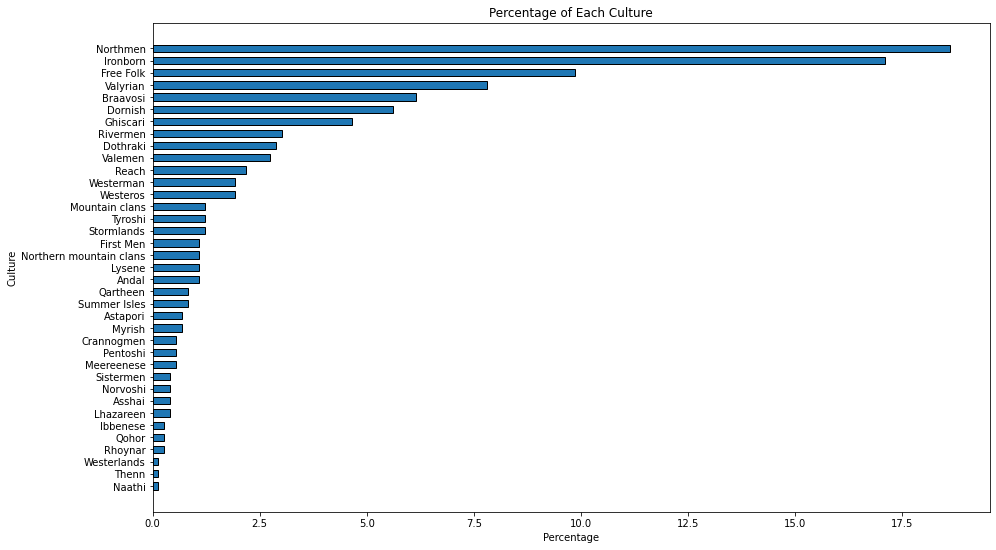

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import lower, col

# Calculate the percentage for each unique value
culture_percentages = []
seen_cultures = set()  # Keep track of unique lowercase culture names

for culture_value in distinct_cultures:
    # Change: Convert culture names to lowercase for case-insensitive comparison
    lower_culture = culture_value.lower()

    if lower_culture not in seen_cultures:
        matching_rows = filtered_df.filter(lower(col("culture")) == lower_culture).count()
        percentage = (matching_rows / total_rows) * 100
        culture_percentages.append((culture_value, percentage))
        seen_cultures.add(lower_culture)

# Sort the cultures based on percentages in descending order
culture_percentages.sort(key=lambda x: x[1], reverse=False)
cultures, percentages = zip(*culture_percentages)
bar_positions = range(len(cultures))

# Set the size of the figure
fig, ax = plt.subplots(figsize=(15, 9))  # Adjust the size (width, height)

# Create a horizontal bar chart with increased space between bars
bar_height = 0.6  # Adjust the height of the bars
bar_padding = 0.2  # Adjust the padding between bars
ax.barh(bar_positions, percentages, height=bar_height, align='center', edgecolor='black')
ax.set_ylabel("Culture")
ax.set_xlabel("Percentage")
ax.set_title("Percentage of Each Culture")
ax.set_yticks(bar_positions)
ax.set_yticklabels(cultures)
plt.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots
plt.show()


Procenat polova u knjigama

Sabirali smo svaki pol i izracunali smo procenat.

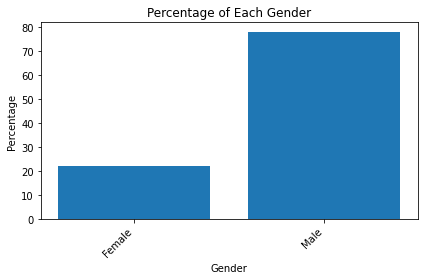

In [0]:
import matplotlib.pyplot as plt

# Filter out rows where the "gender" column is null
filtered_gender_df = df.filter(col("gender").isNotNull())

# Count the total number of non-null rows in the DataFrame
total_gender_rows = filtered_gender_df.count()

# Get distinct values in the "gender" column
distinct_genders = filtered_gender_df.select("gender").distinct().rdd.flatMap(lambda x: x).collect()

# Calculate the percentage for each unique value
gender_percentages = []

for gender_value in distinct_genders:
    matching_rows = filtered_gender_df.filter(col("gender") == gender_value).count()
    percentage = (matching_rows / total_gender_rows) * 100
    gender_percentages.append((gender_value, percentage))

# Create a bar chart with rotated x-axis labels
gender_values, percentages = zip(*gender_percentages)
plt.bar(gender_values, percentages)
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Percentage of Each Gender")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Procenat pola u svakoj kulturi

Uradili smo korelaciju izmedju polova i kultura da vidimo koliki je procenat

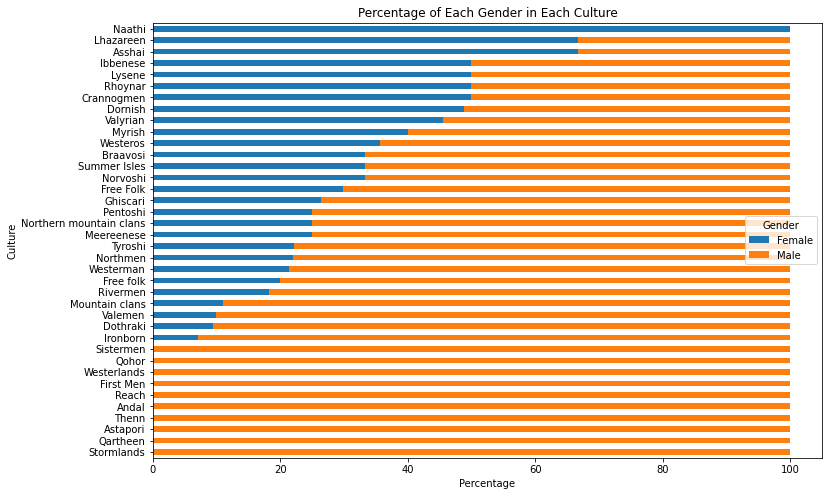

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, expr

# Assuming you have a SparkSession named 'spark'
spark = SparkSession.builder.appName("GenderPercentageByCulture").getOrCreate()

# Assuming your DataFrame is named 'filtered_df' with columns 'gender' and 'culture'
# You may need to adjust column names based on your actual DataFrame structure

# Group by 'culture' and 'gender', and calculate the count for each group
grouped_df = filtered_df.groupBy("culture", "gender").agg(count("*").alias("count"))

# Calculate the total count for each culture
total_counts = grouped_df.groupBy("culture").agg(expr("sum(count)").alias("total_count"))

# Join the grouped data with the total counts
result_df = grouped_df.join(total_counts, "culture")

# Calculate the percentage for each gender within each culture
result_df = result_df.withColumn("percentage", col("count") / col("total_count") * 100)

# Pivot the data to have separate columns for each gender
result_pivoted = result_df.groupBy("culture").pivot("gender").agg(expr("coalesce(first(percentage), 0)"))

# Sort the DataFrame by the percentage of males in descending order
result_pd_sorted = result_pd.sort_values(by="Male", ascending=False)

# Plot the horizontal bar chart with sorted cultures on the y-axis
result_pd_sorted.set_index("culture").plot(kind="barh", stacked=True, figsize=(12, 8))
plt.title("Percentage of Each Gender in Each Culture")
plt.xlabel("Percentage")
plt.ylabel("Culture")
plt.legend(title="Gender")
plt.show()


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import corr

# Assuming 'spark' is your SparkSession

# Read the CSV file into a DataFrame
file_location = "/FileStore/kafka_data_got-1.csv"
file_type = "csv"
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

# Group by 'culture' and 'gender' and calculate the correlation
correlation_df = df.groupBy("culture", "gender") \
                   .agg(corr("culture", "gender").alias("correlation"))

# Display the resulting DataFrame
display(correlation_df)


culture,gender,correlation
Ghiscari,Female,null
Naathi,Female,null
Ironborn,Male,null
Andal,Male,null
Lhazareen,Male,null
Summer Isles,Male,null
Myrish,Female,null
Free folk,Male,null
Dothraki,Male,null
Dothraki,Female,null
